# Tutorial 5

**Rémy BARBERET
Mélissa BUCZKO
Léo CHARDON
Mathilde CORRADI
Antoine COURCELLE
E5FI groupe 1I**

In [1]:
import os

import numpy as np
import scipy.signal
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
def load_data(filename):
    data = []
    directory = "2nd_test"
    f = os.path.join(directory, filename)
    with open(f, "r") as file:
        lines = file.readlines()
        for line in lines:
            data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')


In [3]:
first = load_data("2004.02.13.03.02.39")
second = load_data("2004.02.16.14.22.39")
third = load_data("2004.02.18.08.02.39")


### Calculation of the theoretical failure frequencies of the bearing

In [4]:
Pd = 2.815
Bd = 0.331
Nb = 16
B = 0
Frot = 33.33

BPFO = Nb / 2 * (1 - Bd / Pd * np.cos(B)) * Frot
BPFI = Nb / 2 * (1 + Bd / Pd * np.cos(B)) * Frot
BSFT = Pd/Bd * (1 - (Bd/Pd * np.cos(B))**2) * Frot
FTF = 1/2 * (1 - Bd/Pd * np.cos(B)) * Frot

print(f"BPFO: {BPFO} Hz")
print(f"BPFI: {BPFI} Hz")
print(f"BSFT: {BSFT} Hz")
print(f"FTF: {FTF} Hz")


BPFO: 235.28730373001775 Hz
BPFI: 297.9926962699822 Hz
BSFT: 279.53695526232474 Hz
FTF: 14.70545648312611 Hz


### Time-domain analysis

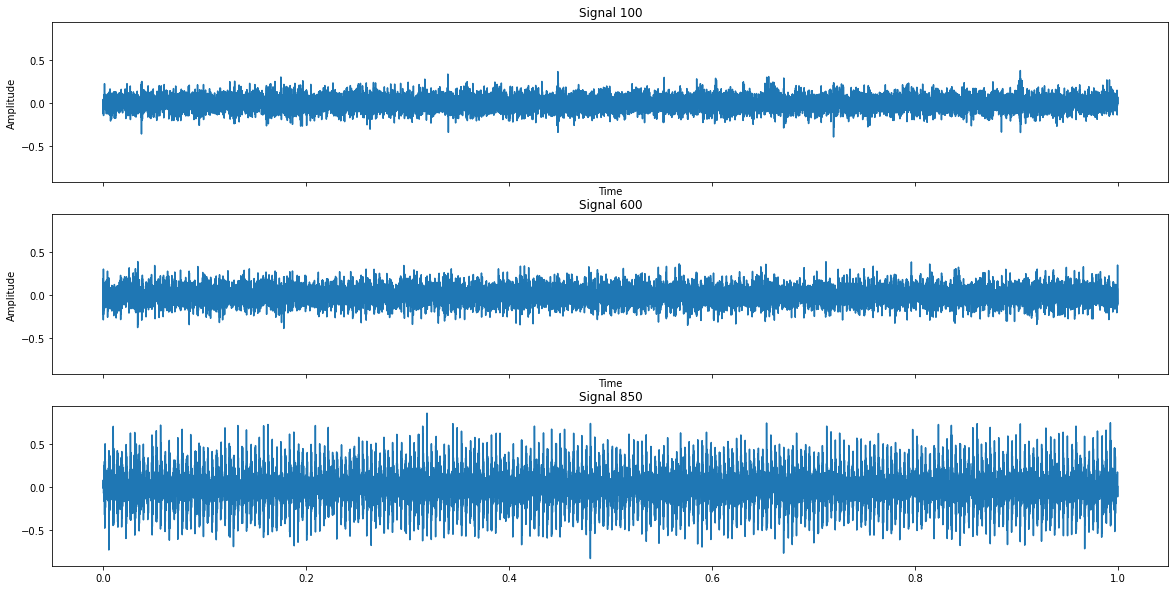

In [5]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
axs[0].plot(np.linspace(0, 1, len(first)), first[:, 0])
axs[1].plot(np.linspace(0, 1, len(first)), second[:, 0])
axs[2].plot(np.linspace(0, 1, len(first)), third[:, 0])
axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Amplitude")


### Spectral-domain analysis

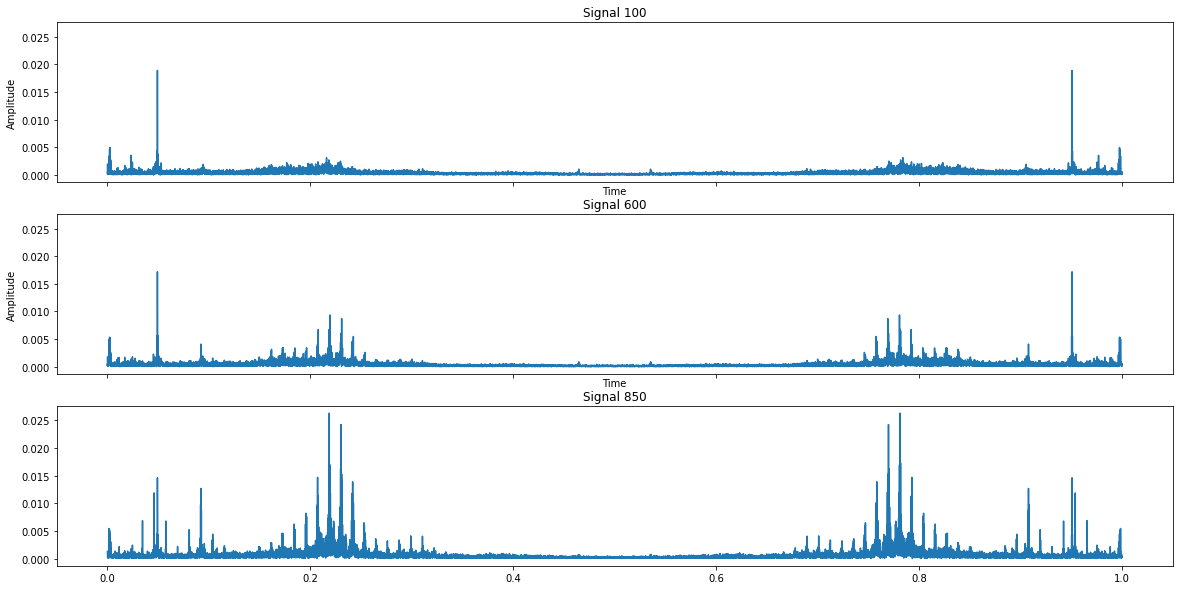

In [6]:
signals = [
    first[:, 0],
    second[:, 0],
    third[:, 0]
]

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    fft = np.fft.fft(signal)
    samples = len(signal)
    magnitude = np.sqrt(fft.real ** 2 + fft.imag ** 2)
    axs[i].plot(np.linspace(0, 1, samples), abs(magnitude) / samples)
    
axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Amplitude")


### Envelope

Calculate envelope

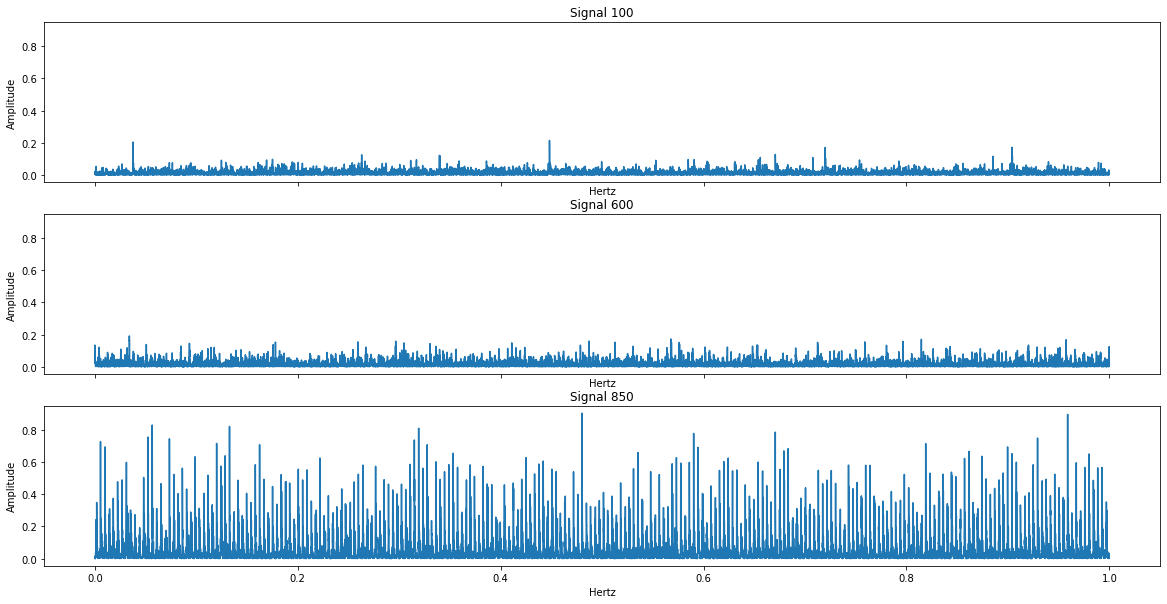

In [9]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    samples = len(signal)
    hilbert = scipy.signal.hilbert(signal)
    envelope = np.square(np.abs(hilbert))
    axs[i].plot(np.linspace(0, 1, samples), envelope)

axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Hertz")
    axs[i].set_ylabel("Amplitude")


Calculate envelope spectrum

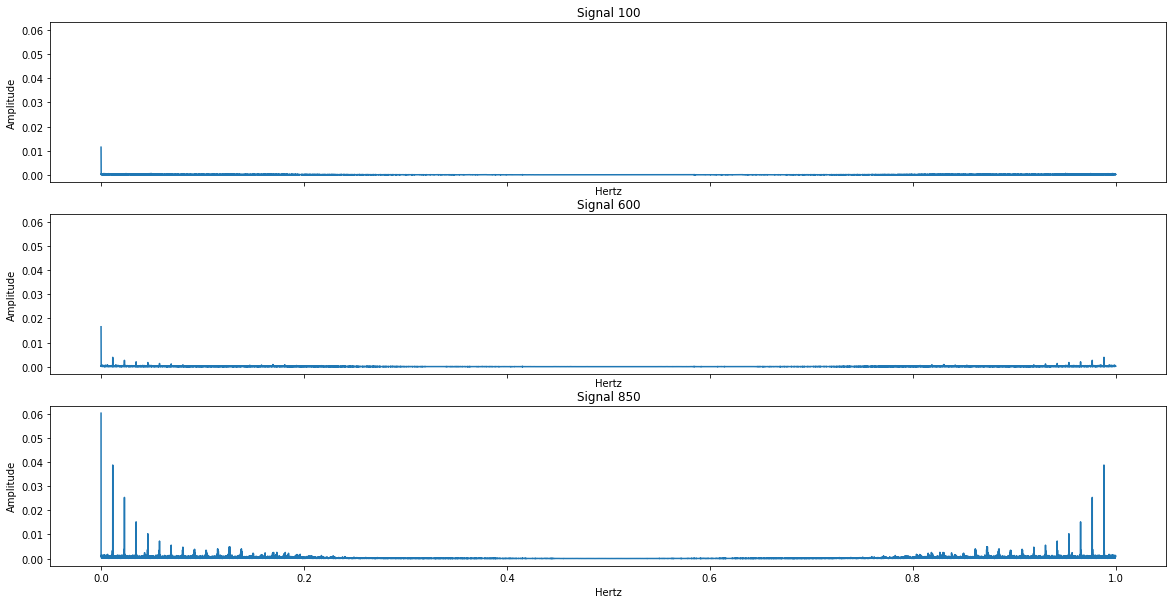

In [16]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    samples = len(signal)
    X_anal = scipy.signal.hilbert(signal)
    envelope = np.square(np.abs(X_anal))
    fft = np.fft.fft(envelope)
    magnitude = np.sqrt(fft.real ** 2 + fft.imag ** 2)
    axs[i].plot(np.linspace(0, 1, samples), abs(magnitude) / samples)

axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Hertz")
    axs[i].set_ylabel("Amplitude")
